<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_five_layers_r_squared_ago_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.0 MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 408 (delta 66), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (408/408), 165.55 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (189/189), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 14.14 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     117  171.303452  176.847183  ...   76.137405   73.075096   96.487335
1     135  153.019196  174.301178  ...   21.045870    5.038024    5.751331
2     112  146.687500  147.312500  ...  164.500000  164.687500  159.687500
3     136    0.424740    1.395329  ...  131.438599  129.035477  126.452423
4     105  155.133347  156.920029  ...  118.791122  112.506676  111.200012
5     168  164.333328  168.194443  ...  193.805557  164.666672  126.777779
6     144  253.924377  253.729172  ...  172.255402  172.145065  171.179016
7     166  252.528793  250.503845  ...  181.678894  189.903595  187.581635
8     133   69.747925   72.739616  ...  223.534622  180.310242  160.349030
9     102  120.074211  122.750870  ...    0.745098    1.372549    1.725490
10    176  190.601761  192.121384  ...   64.683365   82.294418   89.597618
11    145  151.087128  143.431580  ...  110.264305  109.602089  108.112923
12    196  184.387756  17

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.74 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '5 layers of Convolution: 32, 64, 128, 256, 512 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()

model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=512, kernel_size=(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 32s 197ms/step - loss: 25.7714 - accuracy: 0.5656 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 103ms/step - loss: 1.4343 - accuracy: 0.5160 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 102ms/step - loss: 0.7579 - accuracy: 0.4985 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 100ms/step - loss: 0.6913 - accuracy: 0.4956 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 98ms/step - loss: 0.6933 - accuracy: 0.4956 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 99ms/step - loss: 0.6933 - accuracy: 0.4956 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 101ms/step - loss: 0.6933 - accuracy: 0.4956 - val_loss: 0.6930 - val_accuracy: 0.5102

In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction = np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   122.0   53.482124   44.769955  ...   48.417629   45.946789   39.860249
1   132.0  127.720856  126.203857  ...   53.087234   53.450878   53.274567
2   181.0   96.559853   96.366013  ...    5.817802    5.798999    5.845151
3   119.0   82.861595   83.034599  ...   61.584774   59.840832   57.342560
4   181.0   55.821743   76.831665  ...   63.831818   64.485519   56.518978
5   162.0   39.229080   38.320683  ...   59.909466   59.210335   55.357567
6   158.0   77.604866   78.754684  ...    0.747797    0.161513    0.000000
7   149.0   83.639160   77.228371  ...  114.717628  117.006012  120.807457
8   123.0  142.025330  138.465134  ...   54.474586   53.271931   32.200081
9   133.0   83.216072   76.202225  ...   67.700836   66.867035   67.049866
10  125.0  102.025665  106.798790  ...   79.216644   79.602180   77.942665
11  109.0   34.079033   46.051929  ...  124.137100  119.893272  122.674011
12  132.0   57.524338   4

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 682, done.
remote: Counting objects: 100% (443/443), done.
remote: Compressing objects: 100% (441/441), done.
remote: Total 682 (delta 278), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (682/682), 5.56 MiB | 6.59 MiB/s, done.
Resolving deltas: 100% (415/415), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,122.0,53.482124,44.769955,22.670517,5.144048,2.806772,2.212846,3.311475,5.098092,17.637463,49.059658,74.334587,86.313080,89.438583,91.763771,91.882011,87.397743,80.131683,66.517059,63.714588,62.592846,66.040581,70.229782,71.796562,70.048096,74.081154,75.185165,74.744148,76.348564,59.198334,57.264980,47.080086,18.249126,5.516797,4.789573,6.489653,21.435099,49.149422,69.045685,82.995697,...,54.140816,54.647137,53.196182,55.595535,54.669170,52.398815,49.556572,46.878258,42.500942,36.282719,31.840363,28.827198,144.720230,94.359581,76.048370,82.133293,83.640945,86.078468,87.664879,87.663254,85.314964,74.298035,56.538563,55.111526,56.992470,54.823162,54.097824,52.213387,52.536949,53.263638,54.151840,55.786884,54.568661,54.938454,53.470573,52.664871,50.239182,48.417629,45.946789,39.860249
1,132.0,127.720856,126.203857,122.465569,113.584023,100.452713,90.086327,88.509651,87.606987,83.869614,76.831963,68.561989,67.572090,65.154274,62.521580,64.620758,65.568413,65.703400,74.712585,94.993584,101.613411,91.187340,74.704315,68.561989,69.736465,68.593208,71.479340,73.528931,70.505058,126.780540,130.760330,130.973389,128.630859,122.882469,116.583115,105.102852,95.785133,90.497704,83.548210,77.678604,...,68.398529,71.391190,65.953171,56.343441,54.974293,56.526176,56.157028,54.211208,55.213959,53.897156,52.577595,51.833794,81.390266,88.848495,92.976128,90.654732,83.722687,65.519745,59.619839,61.235081,66.422409,77.359047,88.037659,86.406799,81.441696,70.988068,65.079895,63.144173,61.074387,58.532600,56.393944,56.918274,54.620754,54.164375,53.435261,52.214878,52.163452,53.087234,53.450878,53.274567
2,181.0,96.559853,96.366013,98.867462,100.981995,102.374168,107.345268,111.229843,112.375854,106.991913,79.610451,59.832150,59.745762,58.729435,58.670948,57.172642,55.854858,56.052898,57.635815,59.480362,61.374439,71.769608,85.969284,95.512932,97.762985,93.125801,87.429810,85.515121,82.846100,95.220451,96.612526,99.524467,99.841125,103.898232,106.266960,104.489273,104.716499,83.872467,57.325661,57.373192,...,0.216202,0.506792,0.459785,0.239278,0.358078,0.392265,0.392265,0.392265,0.392265,0.465767,0.425597,0.425598,10.707488,7.448490,6.415250,5.960442,6.216935,6.526327,6.300693,6.415219,6.031470,5.819511,6.541193,7.737920,7.182260,6.546443,6.461372,6.404963,5.798999,5.434907,6.093862,5.919508,6.034889,6.164800,5.840878,5.555417,5.932328,5.817802,5.798999,5.845151
3,119.0,82.861595,83.034599,81.837364,79.214539,79.581314,81.214539,82.757782,81.982704,81.896194,80.968857,75.875435,66.283737,100.453293,105.532883,108.595154,110.885811,115.823532,123.069214,130.339111,139.487885,145.560562,144.418701,140.609009,142.588226,155.173004,157.221466,156.899643,124.325256,85.726646,83.242218,78.446365,75.131485,76.432526,78.923874,79.927338,79.373703,79.681656,77.010376,50.083046,...,108.605545,86.778549,60.093430,53.408306,55.716263,57.702427,56.844292,54.110725,57.695499,60.595154,59.750870,59.979237,111.287201,113.418686,110.294128,105.802765,105.193764,103.325264,104.484436,103.730103,105.006912,105.622833,108.006912,112.754326,116.712799,117.640137,117.806229,118.539787,117.173004,103.692039,67.823532,51.228371,52.470589,54.498272,55.875435,56.906578,59.557098,61.584774,59.840832,57.342560
4,181.0,55.821743,76.831665,96.225792,104.837372,106.403267,117.628258,119.225525,115.049759,110.612747,96.214478,82.137054,72.926292,73.575989,74.001190,79.128059,85.421021,82.300903,25.815210,46.157967,65.850708,66.724983,62.892006,66.512993,65.698059,64.721649,64.865913,64.695770,64.001717,60.049206,78.092789,94.202896,100.495499,104.751907,112.854523,114.119019,115.260071,109.046555,95.053757,81.656609,...,24.261837,34.696621,45.716866,52.520252,59.990601,65.987488,66.173012,69.759102,66.91194

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

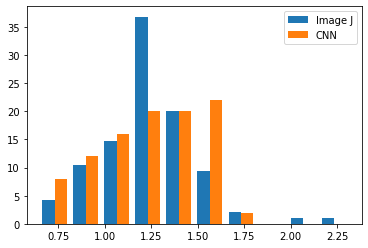

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.04210526, 0.14736842, 0.29473684, 0.66315789, 0.86315789,
         0.95789474, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.08      , 0.2       , 0.36      , 0.56      , 0.76      ,
         0.98      , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.64758457, 0.81457003, 0.98155549, 1.14854096, 1.31552642,
        1.48251188, 1.64949734, 1.8164828 , 1.98346827, 2.15045373,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

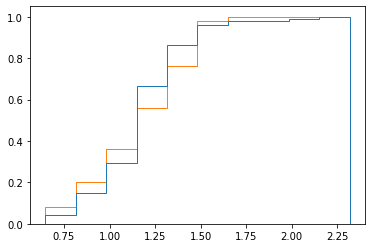

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9764386790481524


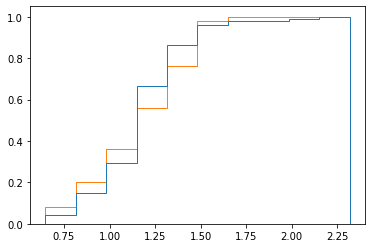

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [31]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [32]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.976439,0.504373,0.489796,0.693115,0.693358,"5 layers of Convolution: 32, 64, 128, 256, 512"


<a list of 2 Lists of Patches objects>
[0.64758457 0.81457003 0.98155549 1.14854096 1.31552642 1.48251188
 1.64949734 1.8164828  1.98346827 2.15045373 2.31743919]
[[ 4.21052632 10.52631579 14.73684211 36.84210526 20.          9.47368421
   2.10526316  0.          1.05263158  1.05263158]
 [ 8.         12.         16.         20.         20.         22.
   2.          0.          0.          0.        ]]


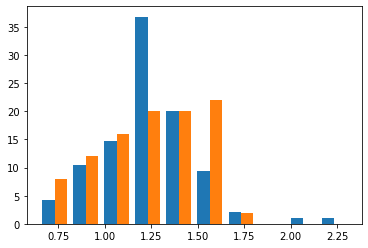

In [34]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [35]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


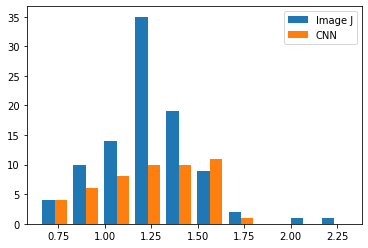

In [36]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [37]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1